Accuracy:  0.7142857142857143
Classification Report: 
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       1.00      0.67      0.80         6

    accuracy                           0.71         7
   macro avg       0.67      0.83      0.65         7
weighted avg       0.90      0.71      0.76         7



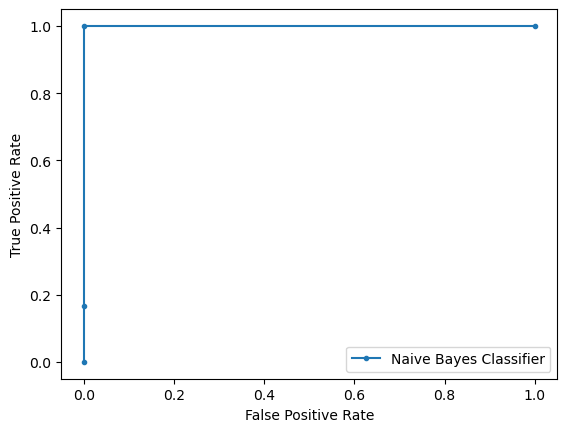

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
data = pd.read_csv('covid.csv')
data
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)
X = np.array(list(zip(pc, wbc, mc, ast, bc, ldh)))
X
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
naivee = MultinomialNB()
naivee.fit(xtrain, ytrain)
ypred = naivee.predict(xtest)
print("Accuracy: ", accuracy_score(ytest, ypred))
print("Classification Report: \n", classification_report(ytest, ypred))
lr_probs = naivee.predict_proba(xtest)
type(lr_probs)
lr_probs
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs
lr_fpr, lr_tpr, _=roc_curve(ytest, lr_probs)
lr_fpr
lr_tpr
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
